In [1]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..',))
sys.path.append(repo_root)

from src.utils.file_handlers import group_dataset_files, read_dataset_files
from src.utils.operation_helpers import run_models_synthetic,  split_games
from sklearn.model_selection import train_test_split
from src.utils.c_operation_helpers import run_simulation_synthetic, run_simulation

Python

In [12]:
data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')

filein_idx = 'N-1000_M-1000_K-5_L-0_nodes.txt'
filein_data = 'N-1000_M-1000_K-5_L-0_edges.txt'

dataset_files = {
    'nodes':filein_idx, 
    'edges': filein_data
    }

data, pi_values = read_dataset_files(dataset_files, data_dir, is_synthetic=True)

train, test = train_test_split(data, train_size=.8)
# train, test = split_games(data, train_size=.8)

results = run_models_synthetic(train, test, pi_values)
print(results)

    model  log-likelihood  leadership-log-likelihood       rms       rho  \
0     BIN       -6.469401                  -1.793008  3.939441  0.818789   
1    BINL       -4.520294                  -1.388880  1.524584  0.634614   
2   HO_BT       -3.999658                  -1.257197  1.163891  0.836187   
3  HOL_BT       -4.322366                  -1.355100  1.496606  0.636395   

        tau  iteration  
0  0.636287       2814  
1  0.455856        510  
2  0.656771        797  
3  0.457566        484  


C

In [13]:

filein_idx = '../datasets/Synthetic_Data/N-1000_M-1000_K-5_L-0_nodes.txt'
filein_data = '../datasets/Synthetic_Data/N-1000_M-1000_K-5_L-0_edges.txt'

results = run_simulation_synthetic(filein_idx, filein_data, .8)
print(results)

  model  av_error  spearman   kendall     prior   HO_Like  HOL_Like iterations
0    HO   0.14557  0.864652  0.680801  -1.75702  -10.4211  -1.15446         16
1   HOL    0.2105  0.659136  0.475127   -1.5743  -11.6072  -1.29111         12
2   BIN  0.150544  0.858279   0.67417  -1.85933  -10.5693  -1.16664         12
3  BINL  0.214772   0.65587  0.472609  -1.68586  -11.9109   -1.3031         10


NameError: name 'generate_figure' is not defined

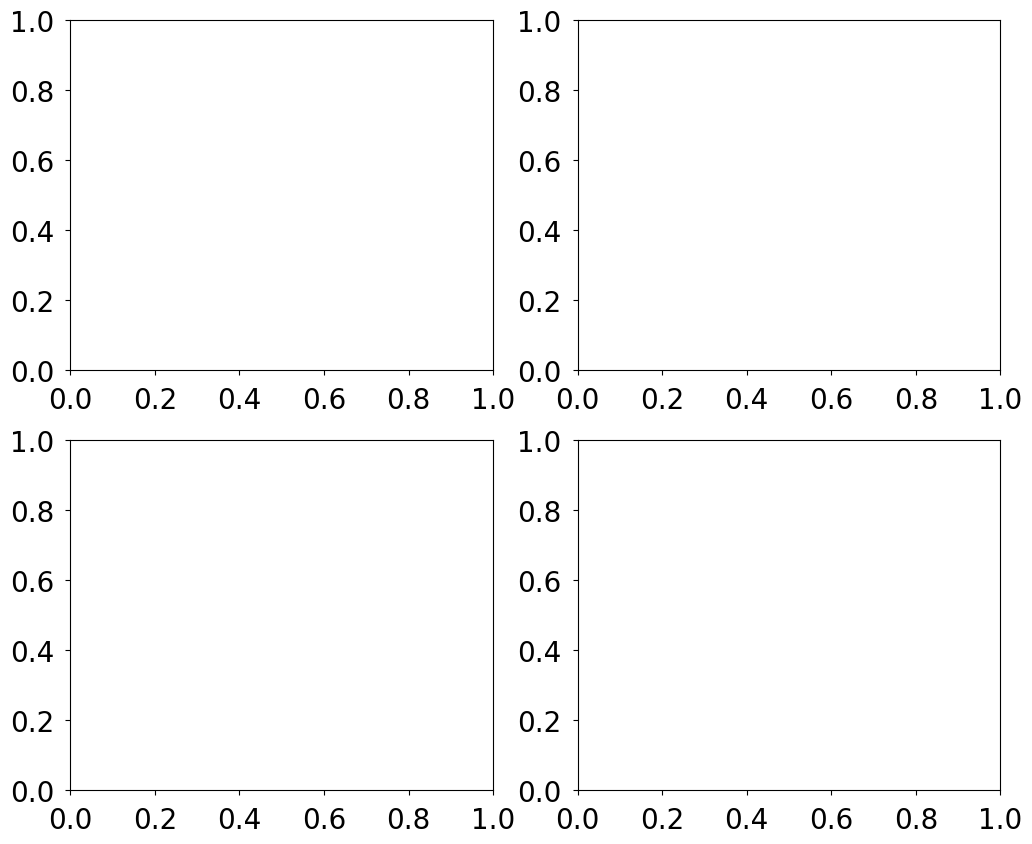

In [4]:
fig = plt.figure(figsize=(12, 10))

plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


generate_figure (data, ax1, 'log_err')
ax1.set_xscale('log')
ax1.legend(loc='lower left', fontsize = 12)
ax1.set_xlabel('Number of hyperdges')
ax1.set_ylabel('MSLE')


generate_figure (data, ax2, 'spear')
ax2.set_xscale('log')
# ax2.legend(loc='lower left', fontsize = 12)
ax2.set_xlabel('Number of hyperdges')
ax2.set_ylabel('Spearman correlation')


generate_figure (data, ax3, 'like_ho')
ax3.set_xscale('log')
ax3.set_xlabel('Number of hyperdges')
ax3.set_ylabel('Log-likehood HO')

generate_figure (data, ax4, 'like_hol')
ax4.set_xscale('log')
ax4.set_xlabel('Number of hyperdges')
ax4.set_ylabel('Log-likehood HOL')

fig.tight_layout()

## Fixed number of hyperedges

In [ ]:
def hist_at_given_sample_size (N, M, K1, K2,ratio, model, T):
    
    data = []
    
    for t in range(0, T):
        G, HO, HOL, BIN = run_simulation (N, M, K1, K2, ratio, model)
        data.append([G, HO, HOL, BIN])
    
    return data


def generate_hist (data, ax, col):
    
    matrix = np.zeros((4, len(data)))
    
    for i in range(0, len(data)):
        
        G = data[i][0]
        HO = data[i][1]
        HOL = data[i][2]
        BIN = data[i][3]
        
        
        if col in G:
            matrix[0][i] = G[col]
            matrix[1][i] = HO[col]#-G[col]
            matrix[2][i] = HOL[col]#-G[col]
            matrix[3][i] = BIN[col]#-G[col]
        else:
            matrix[1][i] = HO[col]
            matrix[2][i] = HOL[col]
            matrix[3][i] = BIN[col]
        
    
   
    ax.hist(matrix[1,:], bins=20, density=True, color ='blue', alpha =0.5, label = 'HO')
    ax.hist(matrix[2,:], bins=20, density=True, color ='green', alpha =0.5, label = 'HOL')
    ax.hist(matrix[3,:], bins=20, density=True, color ='red', alpha =0.5, label = 'BIN')
    

def compare_data (data, col):
    
    count1 = count2 = count3 = total = 0.0
    
    for i in range(0, len(data)):
        
        G = data[i][0]
        HO = data[i][1]
        HOL = data[i][2]
        BIN = data[i][3]
        
        total += 1.0
        if HO[col] <= BIN[col]:
            count1 += 1.0
        if HO[col] <= HOL[col]:
            count2 += 1.0
        if HOL[col] <= BIN[col]:
            count3 += 1.0
            
    print ('#', col)
    print('#P(HO <= BIN) = ', count1/total)
    print('#P(HO <= HOL) = ', count2/total)
    print('#P(HOL <= BIN) = ', count3/total)
    print('\n\n')

In [ ]:
N = 1000
M = 10000
K1 = 5
K2 = 10
ratio = 0.8
model = 1
T = 1000
data_lr = hist_at_given_sample_size (N, M, K1, K2,ratio, model, T)

# log_err
#P(HO <= BIN) =  1.0
#P(HO <= HOL) =  1.0
#P(HOL <= BIN) =  0.0



# spear
#P(HO <= BIN) =  0.0
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  1.0



# like_ho
#P(HO <= BIN) =  0.001
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  1.0



# like_hol
#P(HO <= BIN) =  0.112
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  1.0





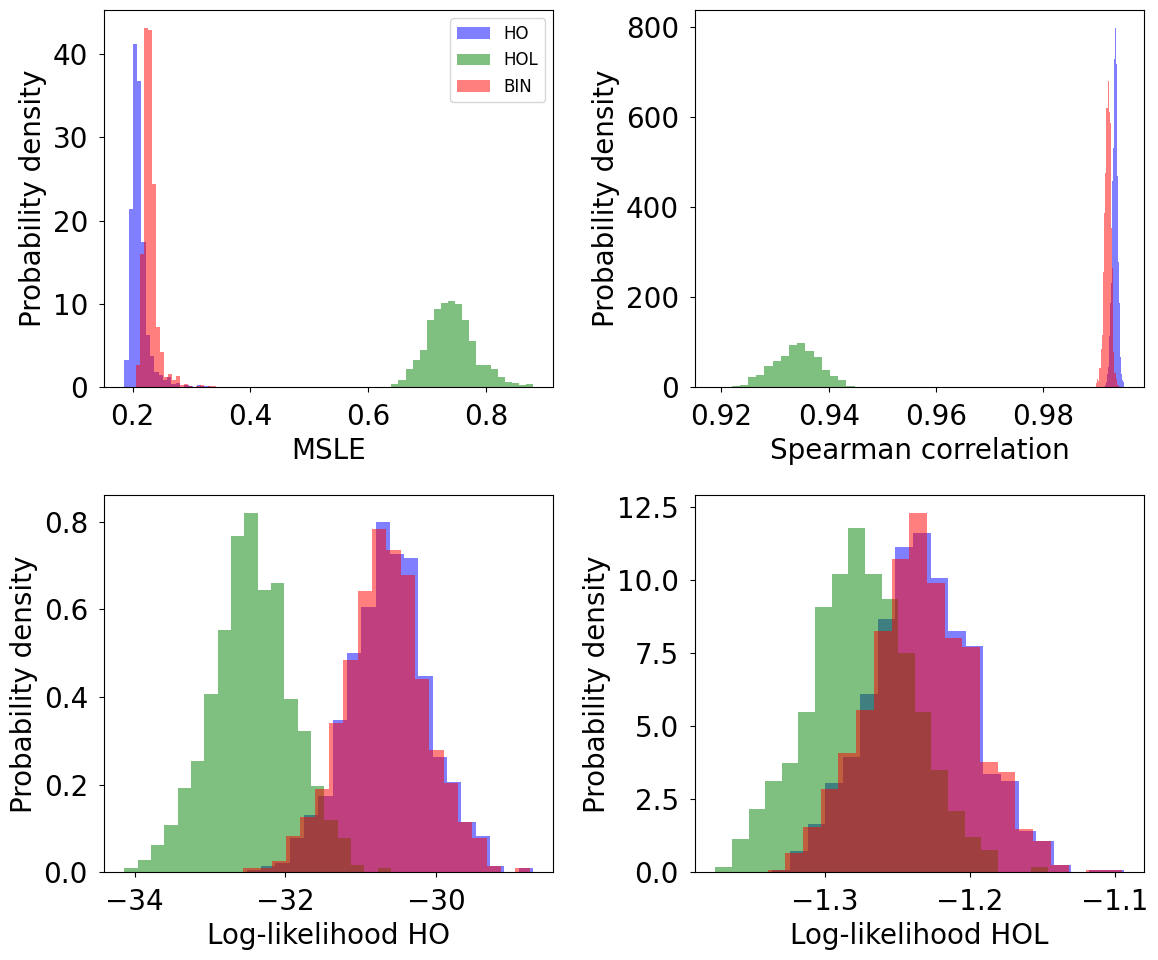

In [ ]:
fig = plt.figure(figsize=(12, 10))

plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


generate_hist (data_lr, ax1, 'log_err')
# ax1.set_xscale('log')
ax1.legend(loc='upper right', fontsize = 12)
compare_data (data_lr, 'log_err')
ax1.set_ylabel('Probability density')
ax1.set_xlabel('MSLE')


generate_hist (data_lr, ax2, 'spear')
# ax2.set_xscale('log')
# ax2.legend(loc='lower left', fontsize = 12)
compare_data (data_lr, 'spear')
ax2.set_ylabel('Probability density')
ax2.set_xlabel('Spearman correlation')


generate_hist (data_lr, ax3, 'like_ho')
# ax3.set_xscale('log')
compare_data (data_lr, 'like_ho')
ax3.set_ylabel('Probability density')
ax3.set_xlabel('Log-likelihood HO')

generate_hist (data_lr, ax4, 'like_hol')
# ax4.set_xscale('log')
compare_data (data_lr, 'like_hol')
ax4.set_ylabel('Probability density')
ax4.set_xlabel('Log-likelihood HOL')

fig.tight_layout()

In [ ]:
N = 1000
M = 10000
K1 = 5
K2 = 10
ratio = 0.8
model = 2
T = 1000
data_lr2 = hist_at_given_sample_size (N, M, K1, K2,ratio, model, T)

# log_err
#P(HO <= BIN) =  0.0
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  0.988



# spear
#P(HO <= BIN) =  1.0
#P(HO <= HOL) =  1.0
#P(HOL <= BIN) =  0.0



# like_ho
#P(HO <= BIN) =  0.0
#P(HO <= HOL) =  0.0
#P(HOL <= BIN) =  0.0



# like_hol
#P(HO <= BIN) =  1.0
#P(HO <= HOL) =  1.0
#P(HOL <= BIN) =  0.0





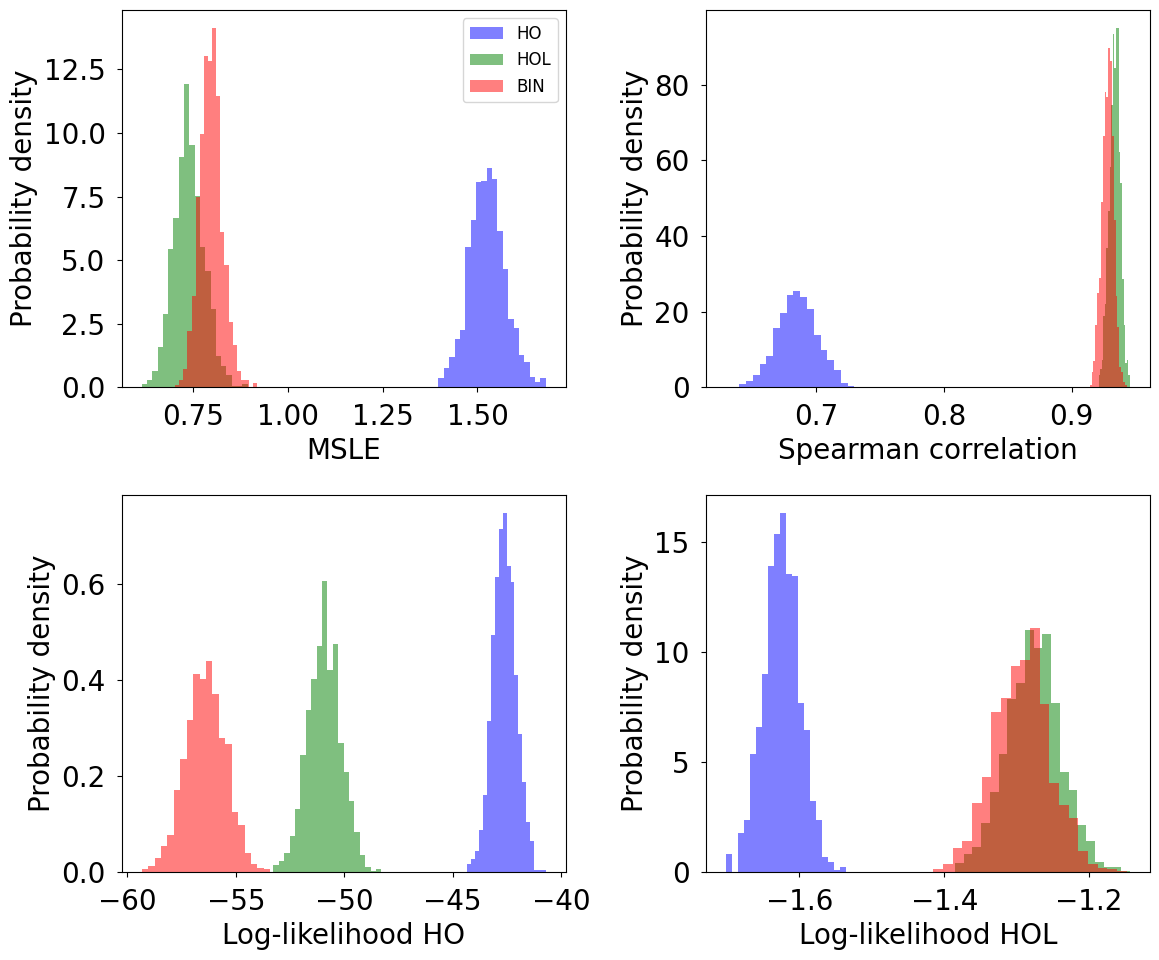

In [ ]:
fig = plt.figure(figsize=(12, 10))

plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


generate_hist (data_lr2, ax1, 'log_err')
# ax1.set_xscale('log')
ax1.legend(loc='upper right', fontsize = 12)
compare_data (data_lr2, 'log_err')
ax1.set_ylabel('Probability density')
ax1.set_xlabel('MSLE')


generate_hist (data_lr2, ax2, 'spear')
# ax2.set_xscale('log')
# ax2.legend(loc='lower left', fontsize = 12)
compare_data (data_lr2, 'spear')
ax2.set_ylabel('Probability density')
ax2.set_xlabel('Spearman correlation')


generate_hist (data_lr2, ax3, 'like_ho')
# ax3.set_xscale('log')
compare_data (data_lr2, 'like_ho')
ax3.set_ylabel('Probability density')
ax3.set_xlabel('Log-likelihood HO')

generate_hist (data_lr2, ax4, 'like_hol')
# ax4.set_xscale('log')
compare_data (data_lr2, 'like_hol')
ax4.set_ylabel('Probability density')
ax4.set_xlabel('Log-likelihood HOL')

fig.tight_layout()

In [ ]:
N = 1000
M = 10000
K1 = 5
K2 = 5
ratio = 0.8
model = 1
T = 100

HO_results = []
for i in range(T):
    G, HO, HOL, BIN = run_simulation (N, M, K1, K2, ratio, model)
    HO_results.append(HO['Iteration'])


print(np.mean(HO_results))



23.4
